## Importing Libraries

In [1]:
# For numeric calculations
import numpy as np
import pandas as pd

# For visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For balancing the dataset
from imblearn.over_sampling import SMOTE

# Ignore warnings
import warnings

In [8]:
# Configurations
warnings.filterwarnings('ignore')

## Loading training exoplanet data into Pandas DataFrame

In [9]:
# Importing training data
train_dataset_path = "./dataset/exoTrain.csv"
train_df = pd.read_csv(train_dataset_path)

X = train_df.drop(["LABEL"], axis=1)
y = train_df["LABEL"]

In [7]:
# Looking into first 15 observations of the train_df
train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [5]:
print(f'Train dataset consists of {train_df.shape[0]} rows and {train_df.shape[1]} columns')

Train dataset consists of 5087 rows and 3198 columns


## Class distribution

In [4]:
y.value_counts()

LABEL
1    5050
2      37
Name: count, dtype: int64

<Axes: ylabel='count'>

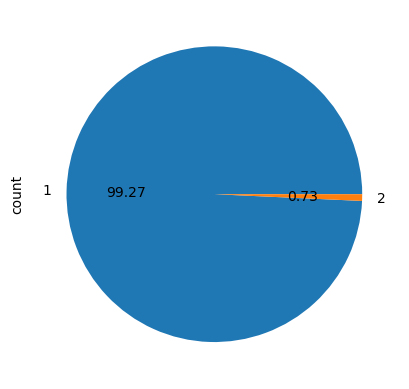

In [5]:
y.value_counts().plot.pie(autopct = "%.2f")

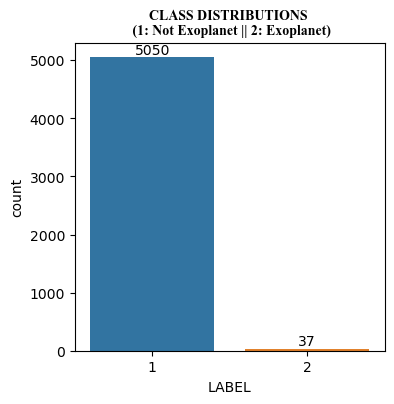

In [8]:
# Visualization - Number of Stars with Confirmed Exoplanets or Not
plt.figure(figsize = (4,4))
plt.title('CLASS DISTRIBUTIONS \n (1: Not Exoplanet || 2: Exoplanet)', fontsize=20, font='times new roman', weight='bold', color='black')
ax = sns.countplot(data = train_df, x = 'LABEL')
ax.bar_label(ax.containers[0])
plt.show()

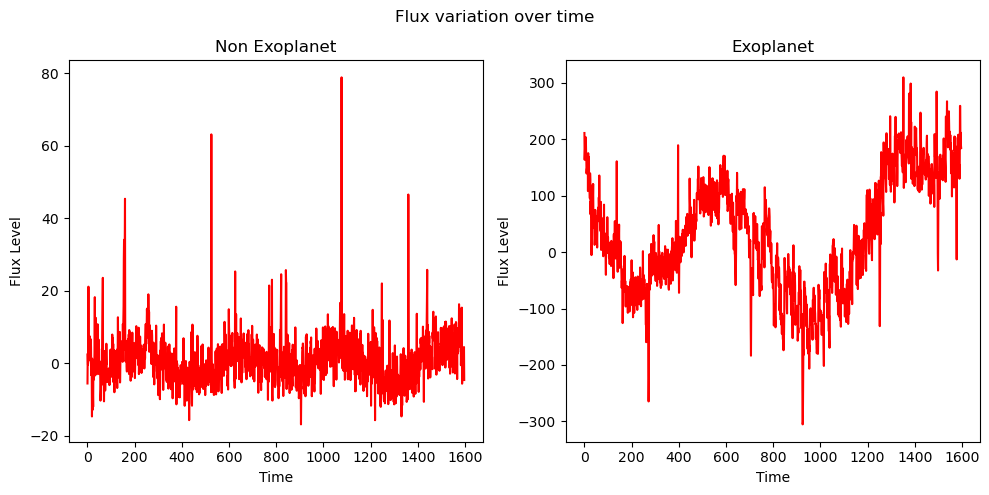

In [6]:
# Setting figure size
plt.figure(figsize=(10, 5))

# Non-exoplanet star light flux visualization over time
row_index = 150 # Selecting random non-exoplanet row
fluxes_non_exo = train_df.iloc[row_index,1:(train_df.shape[1]//2)].values

plt.subplot(1, 2, 1)
plt.plot(fluxes_non_exo, color = "red")
plt.xlabel('Time')
plt.ylabel('Flux Level')
plt.title("Non Exoplanet")

# Exoplanet star light flux visualization over time
row_index = 5 # Selecting random exoplanet row
fluxes_exo = train_df.iloc[row_index,1:(train_df.shape[1]//2)].values

plt.subplot(1, 2, 2)
plt.plot(fluxes_exo, color = "red")
plt.xlabel('Time')
plt.ylabel('Flux Level')
plt.title("Exoplanet")

plt.tight_layout()
plt.suptitle('Flux variation over time') 
plt.subplots_adjust(top=0.88)
plt.show()

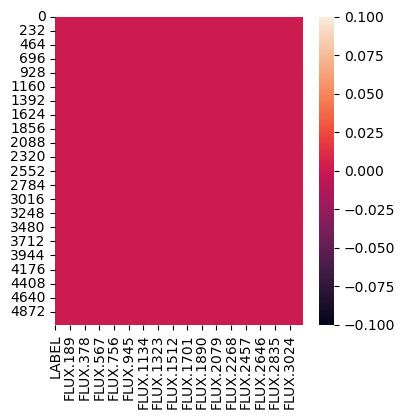

In [10]:
plt.figure(figsize = (4,4))
sns.heatmap(train_df.isnull())
plt.show()

In [38]:
# Over sampling the imbalanced class
smote = SMOTE(sampling_strategy=1)
X_res, y_res = ros.fit_resample(X, y)

<Axes: ylabel='count'>

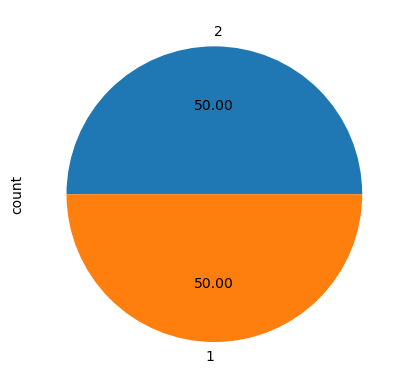

In [39]:
y_res.value_counts().plot.pie(autopct = "%.2f")